In [3]:
import pandas as pd 
import numpy as np

## PREPROCESS THE TWO MATRICES
en_hits=pd.read_csv('enrichment_hits_all',sep='\t',header=None,index_col=None)
en_hits=en_hits.rename(columns={0:'metagenome',1:'family'})
en_hits

,metagenome,family
0,2001200001|2001208463|2001223373,cluster636.fa_omega_outpu
1,2001200001|2001223138|2001244859,cluster774.fa_omega_outpu
2,2001200001|2001228029|2001252294,cluster774.fa_omega_outpu
3,2001200001|2001237137|2001266549,cluster1045.fa_omega_outpu
4,2001200001|2001237356|2001266902,cluster1032.fa_omega_outpu
...,...,...
1230296,7000000746|C309622|C309622__gene_9571,cluster1045.fa_omega_outpu
1230297,7000000746|SRS015381_WUGC_scaffold_18523|SRS01...,cluster598.fa_omega_outpu
1230298,7000000747|C482073|C482073__gene_18598,cluster721.fa_omega_outpu
1230299,7000000747|C484447|C484447__gene_20057,cluster99.fa_omega_outpu


In [4]:
# new data frame with split value columns 
new = en_hits["metagenome"].str.split("|", n = 2, expand = True) 
  
# making separate first name column from new data frame 
en_hits["proteinID"]= new[2] 

# Dropping old Name columns 
en_hits.drop(columns =['metagenome'], inplace = True) 
  
# df display 
en_hits 

,family,proteinID
0,cluster636.fa_omega_outpu,2001223373
1,cluster774.fa_omega_outpu,2001244859
2,cluster774.fa_omega_outpu,2001252294
3,cluster1045.fa_omega_outpu,2001266549
4,cluster1032.fa_omega_outpu,2001266902
...,...,...
1230296,cluster1045.fa_omega_outpu,C309622__gene_9571
1230297,cluster598.fa_omega_outpu,SRS015381_WUGC_scaffold_18523__gene_7165
1230298,cluster721.fa_omega_outpu,C482073__gene_18598
1230299,cluster99.fa_omega_outpu,C484447__gene_20057


In [5]:
#extract only the number in the string
import re as re

def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
en_hits['family']=en_hits['family'].apply(lambda x: find_number(x))
en_hits

,family,proteinID
0,636,2001223373
1,774,2001244859
2,774,2001252294
3,1045,2001266549
4,1032,2001266902
...,...,...
1230296,1045,C309622__gene_9571
1230297,598,SRS015381_WUGC_scaffold_18523__gene_7165
1230298,721,C482073__gene_18598
1230299,99,C484447__gene_20057


In [6]:
# save to csv to use in enriched_taxonomy
en_hits.to_csv('fam_tax.csv',sep='\t',header=True,index=False)

In [69]:
en_hits_seq=pd.read_csv('enrichment_hits_all.sequences.txt',sep='\t',header=None,index_col=None)
en_hits_seq=en_hits_seq.rename(columns={0:'metagenome',1:'sequence'})
en_hits_seq

,metagenome,sequence
0,2001200001|2001208463|2001223373,MGKQLGFLRGDTNIRWLQERKVSIGNEWADEEGDLGPVYGKQWRHW...
1,2001200001|2001223138|2001244859,MQALVTKLAKPRTVWLMVPAAVVDSTIHALAPLLEPGDTIIDGGNS...
2,2001200001|2001228029|2001252294,RSRQNVEPLVANGALAAASYEQLAGQLEPPRAVWLLVPAAAVDPVL...
3,2001200001|2001237137|2001266549,MASLNRVFLIGNLTRTPELRYTPSGTAVADLRLAVNRNYTTQGGEK...
4,2001200001|2001237356|2001266902,MKLLDLFSGAGGAAMGYHRAGFDVVGVDIKPQPRYPFEFHQADALE...
...,...,...
1064772,7000000746|C309622|C309622__gene_9571,MLNRVVLVGRLTKDPEFRTTPSGVEVATFTLAVNRTFTNAQGEREA...
1064773,7000000746|SRS015381_WUGC_scaffold_18523|SRS01...,IDDNYDFYSLPDENEENKKTLYDKINHPSHYTYGEIEIMDFIEQVT...
1064774,7000000747|C482073|C482073__gene_18598,MAGETIITVVGNLTSDPELRYTPAGAAVANFTIASTPRTYNRQTGQ...
1064775,7000000747|C484447|C484447__gene_20057,IVAKHYAKRHILPRDVVEAHEKGEIHYHDLDYAPFFPMFNCMLVDL...


In [70]:
# new data frame with split value columns 
new = en_hits_seq["metagenome"].str.split("|", n = 2, expand = True) 
  
# making separate first name column from new data frame 
en_hits_seq["proteinID"]= new[2] 
  
# Dropping old Name columns 
en_hits_seq.drop(columns =['metagenome'], inplace = True) 


In [72]:
en_hits_seq['proteinID']=en_hits_seq['proteinID'].astype(str)
en_hits_seq['proteinID']='>'+en_hits_seq['proteinID'].str[:]


In [73]:
en_hits_seq

,sequence,proteinID
0,MGKQLGFLRGDTNIRWLQERKVSIGNEWADEEGDLGPVYGKQWRHW...,>2001223373
1,MQALVTKLAKPRTVWLMVPAAVVDSTIHALAPLLEPGDTIIDGGNS...,>2001244859
2,RSRQNVEPLVANGALAAASYEQLAGQLEPPRAVWLLVPAAAVDPVL...,>2001252294
3,MASLNRVFLIGNLTRTPELRYTPSGTAVADLRLAVNRNYTTQGGEK...,>2001266549
4,MKLLDLFSGAGGAAMGYHRAGFDVVGVDIKPQPRYPFEFHQADALE...,>2001266902
...,...,...
1064772,MLNRVVLVGRLTKDPEFRTTPSGVEVATFTLAVNRTFTNAQGEREA...,>C309622__gene_9571
1064773,IDDNYDFYSLPDENEENKKTLYDKINHPSHYTYGEIEIMDFIEQVT...,>SRS015381_WUGC_scaffold_18523__gene_7165
1064774,MAGETIITVVGNLTSDPELRYTPAGAAVANFTIASTPRTYNRQTGQ...,>C482073__gene_18598
1064775,IVAKHYAKRHILPRDVVEAHEKGEIHYHDLDYAPFFPMFNCMLVDL...,>C484447__gene_20057


In [75]:
en_hits_seq.to_csv('metage.fa',columns=['proteinID','sequence'],sep='\n',index=False, header=None)

In [8]:
#we will append the metagenomes sequences in the cluster families
en_hits_seq['family']=en_hits[['family']]

In [9]:
taxonIDS=en_hits_seq['taxonID'].unique()
taxonIDS=taxonIDS.tolist()
#this is to get the habitats of the metagenomes from IMG/M
with open('metagenomes_ID.txt', 'w') as f:
    for item in taxonIDS:
        f.write("%s\n" % item)

In [10]:
viral_20=pd.read_csv('VIRAL_FAMILIES_20.txt',sep='\t',header=None,index_col=None)
viral_20=viral_20.rename(columns={0:'family',1:'taxonID',2:'lineage',3:'sequence'})
viral_20.drop(columns=['lineage'],inplace=True)
viral_20

,family,taxonID,sequence
0,1,YP_009237910.1,MPPKRNGIYSKNYFITYPKCSLTKEEALSQLLNIQTPTSKKYIRIC...
1,1,YP_009316020.1,MPPKRNGFYSKNYFITYPKCSLTKEEALSQLLNIQTPTSKKYIRIC...
2,1,YP_009508460.1,MPPKRNGIYSKNYFITYPKCSLTKEEALSQLLNLQTPTSKKYIKIC...
3,1,YP_001086462.1,MPPRRNGIYSKNYFITYPKCSLTKEETLSQLLNLQTPTSKKIYIKI...
4,1,NP_443744.1,MPPKRNGIYSKNYFITYPKCSLTKEEALSQLLNIQTPTSKKYIRIC...
...,...,...,...
37437,1187,YP_006561172.1,MAKVKYGNWDLVKELEEFEKETIRWAKKGIAKTTTIIHNSIVSNMP...
37438,1187,YP_950610.1,MAKVKYGNWELVKELEDFEKETIRWAKKGIAKTTTIIHNSIVSNMP...
37439,1187,YP_950673.1,MAKVKYGNWDLVKELEEFEKETIRWAKKGIAKTTTIIHNSIVSNMP...
37440,1187,YP_006560952.1,MAKVKYGNWDLVKELEEFEKETIRWAKKGIAKTTTIIHNSIVSNMP...


In [11]:
#to get the habitats of initial families sequences 
#in_taxons=viral_20['taxonID'].unique()
#in_taxons=in_taxons.tolist()
#with open('init_seq_ID.txt', 'w') as f:
    #for item in in_taxons:
        #f.write("%s\n" % item)

In [12]:
#viral_20['taxonID']=viral_20['taxonID'].astype(str)
#viral_20['taxonID']='>'+viral_20['taxonID'].str[:]
#viral_20.to_csv('initial_fam.fa',columns=['taxonID','sequence'],sep='\n',index=False, header=None)

In [13]:
#append metagenomes dataframe to family dataframe
viral_enrich=viral_20.append(en_hits_seq,ignore_index=True)
viral_enrich

,family,taxonID,sequence
0,1,YP_009237910.1,MPPKRNGIYSKNYFITYPKCSLTKEEALSQLLNIQTPTSKKYIRIC...
1,1,YP_009316020.1,MPPKRNGFYSKNYFITYPKCSLTKEEALSQLLNIQTPTSKKYIRIC...
2,1,YP_009508460.1,MPPKRNGIYSKNYFITYPKCSLTKEEALSQLLNLQTPTSKKYIKIC...
3,1,YP_001086462.1,MPPRRNGIYSKNYFITYPKCSLTKEETLSQLLNLQTPTSKKIYIKI...
4,1,NP_443744.1,MPPKRNGIYSKNYFITYPKCSLTKEEALSQLLNIQTPTSKKYIRIC...
...,...,...,...
1102214,978,7000000746,MLNRVVLVGRLTKDPEFRTTPSGVEVATFTLAVNRTFTNAQGEREA...
1102215,721,7000000746,IDDNYDFYSLPDENEENKKTLYDKINHPSHYTYGEIEIMDFIEQVT...
1102216,978,7000000747,MAGETIITVVGNLTSDPELRYTPAGAAVANFTIASTPRTYNRQTGQ...
1102217,978,7000000747,IVAKHYAKRHILPRDVVEAHEKGEIHYHDLDYAPFFPMFNCMLVDL...


In [14]:
#convert column to numeric
viral_enrich["family"] = pd.to_numeric(viral_enrich["family"])

#sort families to be in groups
viral_enrich=viral_enrich.sort_values(by='family',ignore_index=True)
viral_enrich

,family,taxonID,sequence
0,1,YP_009237910.1,MPPKRNGIYSKNYFITYPKCSLTKEEALSQLLNIQTPTSKKYIRIC...
1,1,NP_632018.1,MHPLNKFRINAKNYFLTYPHCSLTKEEALSQIQALQTPTNKLFIRV...
2,1,YP_009249837.1,MAPPKRFQLNAKHYFLTYPQCSLTKEEALSQLQNLVTPTNKKYIKI...
3,1,NP_620424.1,MAPPNKFRINAKNYFLTYPHCSLTKEEALSQIKALETPINKLFIRI...
4,1,YP_001285874.1,MPQPKKFFINAKNYFLTYPQCSLTKEEALSQISALSTPTNKLFIRI...
...,...,...,...
1102214,1187,3300001842,FGHTAVVFDANPENVALLAKEGATASKSLAHLVEQMPKPRAVWVML...
1102215,1187,YP_009302029.1,MAKVKYGNWELVKELEEFEKETIRWAKKGIAKTTTIIHNSIVSNMP...
1102216,1187,YP_006560952.1,MAKVKYGNWDLVKELEEFEKETIRWAKKGIAKTTTIIHNSIVSNMP...
1102217,1187,3300012525,MQMYNQEYLQEKWAPLLNYEGLDPIKDSHRRMVTAVLLENQEKALR...


In [15]:
#save to csv
#viral_enrich.to_csv('viral_enrich.csv',sep='\t',header=True,index=False)

In [16]:
#viral_enrich['taxonID']=viral_enrich['taxonID'].astype(str)
#viral_enrich['taxonID']='>'+viral_enrich['taxonID'].str[:]
#viral_enrich

In [17]:
#viral_enrich.to_csv('enrich_metage.fa',columns=['taxonID','sequence'],sep='\n',index=False, header=None)

In [18]:
## we will enrich the enriched and non-enriched families with pfam hits to make plots

#first input the enriched pfam hits(domains)
en_dom=pd.read_csv('enrich__domains.csv',header=None,names=['taxonID','domains'],sep=' ')
en_dom

,taxonID,domains
0,3300007152,2-Hacid_dh_C
1,3300006893,2-Hacid_dh_C
2,3300006893,2-Hacid_dh_C
3,3300006893,2-Hacid_dh_C
4,3300013012,2-Hacid_dh_C
...,...,...
1350675,3300009528,Zn_ribbon_recom
1350676,3300001422,Zn_ribbon_recom
1350677,3300009528,Zn_ribbon_recom
1350678,3300009528,Zn_ribbon_recom


In [19]:
#same procedure for initial hits
in_dom=pd.read_csv('initial_domains.csv',header=None,names=['taxonID','domains'],sep=' ')
in_dom

,taxonID,domains
0,YP_009288607.1,5_3_exonuc_N
1,YP_009030856.1,5_3_exonuc_N
2,YP_009290507.1,5_3_exonuc_N
3,NP_049859.1,5_3_exonuc_N
4,YP_009111059.1,5_3_exonuc_N
...,...,...
26747,YP_009152392.1,zf-CHC2
26748,YP_008531893.1,zf-CHC2
26749,YP_009160085.1,zf-CHC2
26750,YP_007237091.1,zf-CHC2


In [20]:
#make unique genome values
en_dom = en_dom.drop_duplicates(subset=['taxonID','domains'])
en_dom

,taxonID,domains
0,3300007152,2-Hacid_dh_C
1,3300006893,2-Hacid_dh_C
4,3300013012,2-Hacid_dh_C
5,3300010044,2-Hacid_dh_C
6,3300012677,2-Hacid_dh_C
...,...,...
1350672,3300009528,Zn_ribbon_recom
1350673,3300004152,Zn_ribbon_recom
1350674,3300012942,Zn_ribbon_recom
1350676,3300001422,Zn_ribbon_recom


In [21]:
#make unique genome values
in_dom = in_dom.drop_duplicates(subset=['taxonID','domains'])
in_dom

,taxonID,domains
0,YP_009288607.1,5_3_exonuc_N
1,YP_009030856.1,5_3_exonuc_N
2,YP_009290507.1,5_3_exonuc_N
3,NP_049859.1,5_3_exonuc_N
4,YP_009111059.1,5_3_exonuc_N
...,...,...
26747,YP_009152392.1,zf-CHC2
26748,YP_008531893.1,zf-CHC2
26749,YP_009160085.1,zf-CHC2
26750,YP_007237091.1,zf-CHC2


In [22]:
#append en_dom to viral_enrich based on column taxonID
families=viral_enrich[['taxonID','family']]
#table showing domain and family
dom_fam=en_dom.join(families.set_index('taxonID'), on='taxonID')
#drop duplicates
dom_fam = dom_fam.drop_duplicates(subset=['domains','family'])
#dom_fam.to_csv('zot.csv',sep='\t',index=False,header=True)

In [23]:
#table showing domain and family
in_fam=in_dom.join(families.set_index('taxonID'), on='taxonID')
#drop duplicates
in_fam = in_fam.drop_duplicates(subset=['domains','family'])
in_fam

,taxonID,domains,family
0,YP_009288607.1,5_3_exonuc_N,1036
21,YP_009798545.1,5_3_exonuc_N,1125
41,YP_007675572.1,6PGD,774
87,NP_042149.1,A2L_zn_ribbon,198
127,YP_007877714.1,AAA,289
...,...,...,...
26597,YP_008409355.1,zf-CHC2,155
26599,YP_008051824.1,zf-CHC2,1183
26661,YP_002223995.1,zf-CHC2,807
26681,YP_009160309.1,zf-CHC2,54


In [25]:
domains=dom_fam['domains'].tolist()
#count the frequency of elements in the list
from itertools import groupby
y_axis=[len(list(group)) for key, group in groupby(domains)]


In [26]:
init_dom=in_fam['domains'].tolist()
#count the frequency of elements in the list
from itertools import groupby
in_y_axis=[len(list(group)) for key, group in groupby(init_dom)]

In [27]:
## what the barplot is going to have:
## at x axis the protein domains
## at y axis the number of families each domain has

## the protein domains

arr=dom_fam.domains.unique()
x_axis=arr.tolist()
len(x_axis)

857

In [28]:
in_arr=in_fam.domains.unique()
in_x_axis=in_arr.tolist()
len(in_x_axis)

446

In [29]:
# create the log2 enriched/non-enriched families of domains to identify the signal
import numpy as np
enriched_list=[]
initial_list=[]
for domain in in_x_axis:
    enriched_domains=dom_fam['family'][dom_fam['domains']==domain].to_list()
    length=len(enriched_domains)
    enriched_list.append(length)


for domain in in_x_axis:
    init_domains=in_fam['family'][in_fam['domains']==domain].to_list()
    length2=len(init_domains)
    initial_list.append(length2)


In [ ]:
initial_list

In [30]:
#division of the enriched/ non-enriched lists 
res = [i / j for i, j in zip(enriched_list, initial_list)] 
#log 2 of the fraction
logtwo=np.log2(res)
logtwo=logtwo.tolist()

In [37]:
len(logtwo)

446

In [ ]:
#keep all the values above one
signal=[]
index=0
for i in logtwo:
    
    if i > 1:
        signal.append(index)
    index+=1


In [54]:
#keep all the values above two
signal2=[]
index2=0
for i in logtwo:
    
    if i > 2:
        signal2.append(index2)
    index2+=1
len(signal2)

363

In [ ]:
#use the index to find the domains
imp_doms=[]
for index in signal:
    log_domain=in_x_axis[index]
    imp_doms.append(log_domain)
    
imp_doms

In [1]:
imp_doms

NameError: name 'imp_doms' is not defined

In [76]:
with open('log2_doms.txt', 'w') as f:
    for item in imp_doms:
        f.write("%s\n" % item)

In [ ]:
#which are the novel domains found in the enriched sequences 

def Diff(li1, li2):
    li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2]
    return li_dif

Diff(x_axis,in_x_axis)

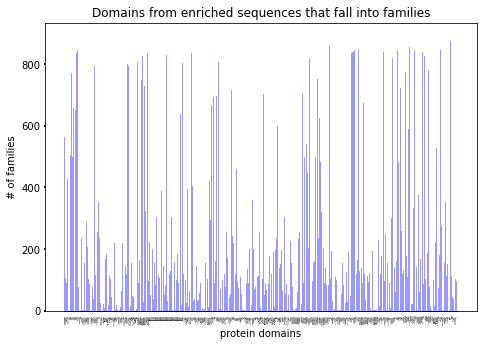

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylabel('# of families')
plt.xlabel('protein domains')
plt.xticks(fontsize=1, rotation=90)
ax.tick_params(width=2,length=1)
plt.title("Domains from enriched sequences that fall into families")
ax.bar(x_axis,y_axis,color='blue',alpha=0.4)
plt.savefig("enriched_domains.png", bbox_inches='tight')

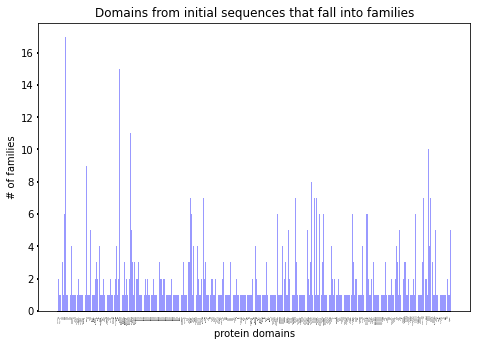

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylabel('# of families')
plt.xlabel('protein domains')
plt.xticks(fontsize=1, rotation=90)
ax.tick_params(width=2,length=1)
plt.title("Domains from initial sequences that fall into families")
ax.bar(in_x_axis,in_y_axis,color='blue',alpha=0.4)
plt.savefig("initial_domains.png", bbox_inches='tight')